In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

datasets:
---------
MAGIC DATASET: https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

In [8]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1","fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [9]:
df["class"] = (df["class"] =="g").astype(int)
df["class"].unique()

array([1, 0])

In [10]:
first_index_class_0 = df[df["class"] == 0].index[0]
first_index_class_0

np.int64(12332)

In [11]:
df.loc[first_index_class_0]

fLength      93.7035
fWidth       37.9432
fSize         3.1454
fConc         0.1680
fConc1        0.1011
fAsym        53.2566
fM3Long      89.0566
fM3Trans     11.8175
fAlpha       14.1224
fDist       231.9028
class         0.0000
Name: 12332, dtype: float64

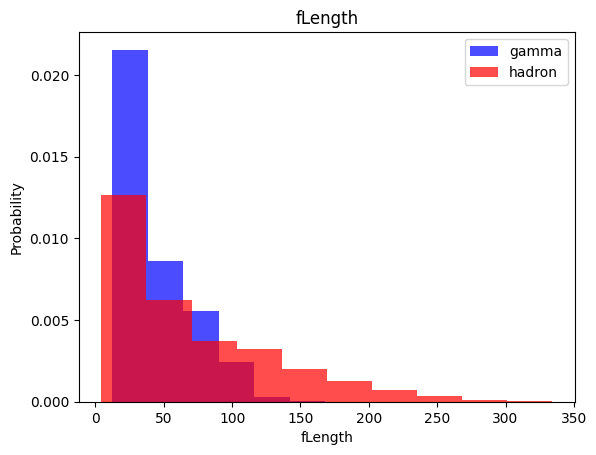

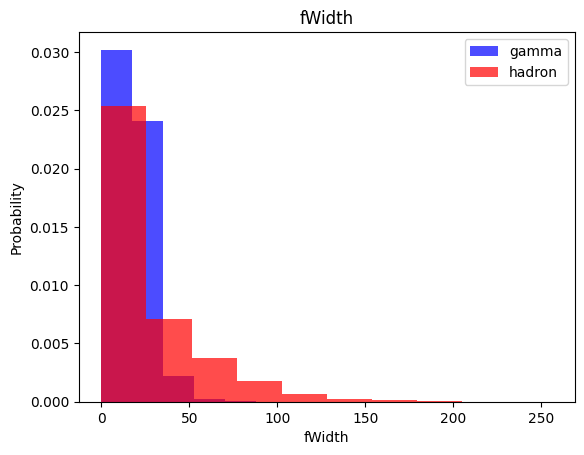

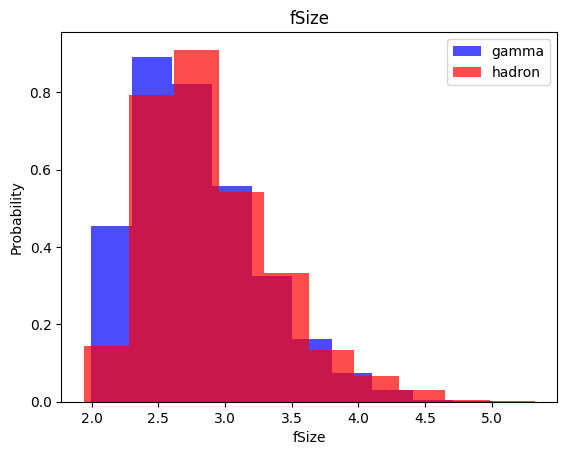

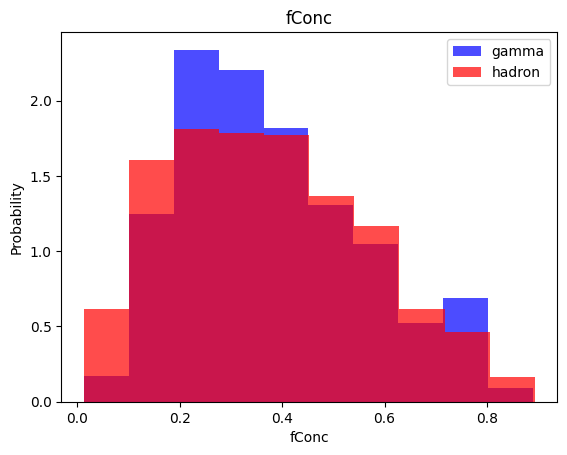

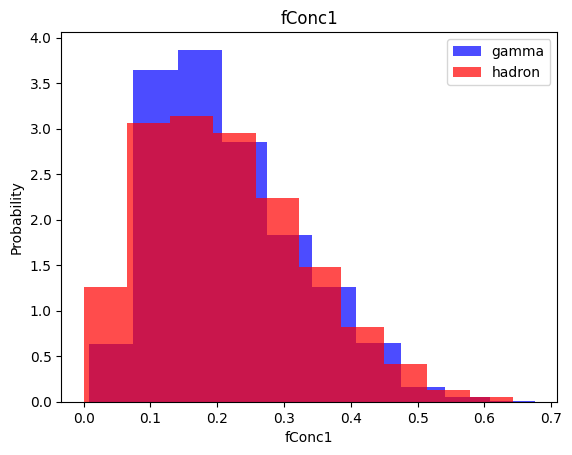

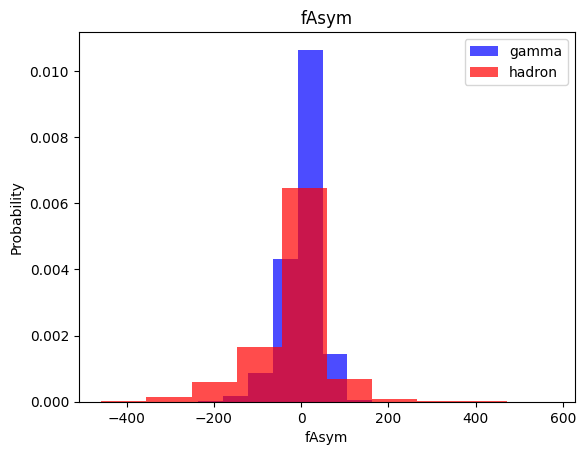

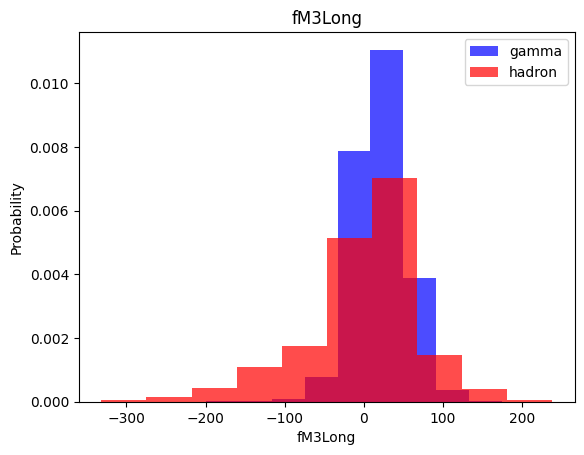

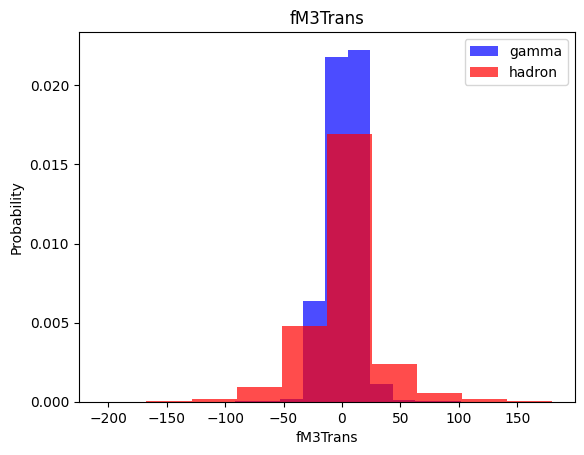

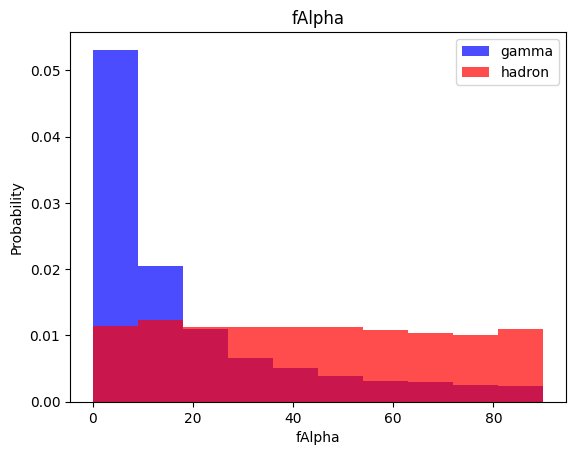

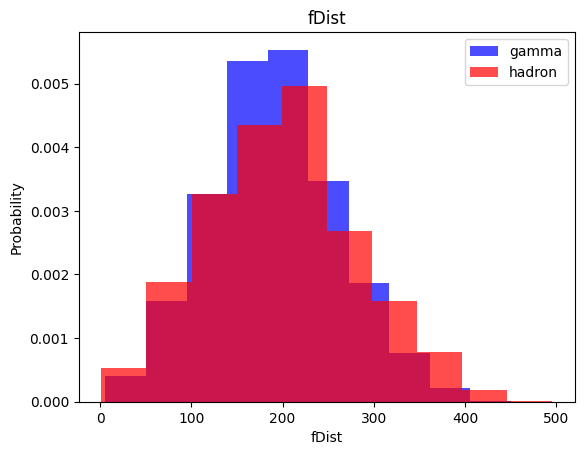

In [12]:
for label  in cols[:-1]:
    plt.hist(df[df["class"]==1][label], color="blue", label="gamma", alpha=0.7, density=True)
    plt.hist(df[df["class"]==0][label], color="red", label="hadron", alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

Train, validation, test dataset

In [13]:
train, valid, test = np.array_split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))], )

d:\ML\MLApprentice-100DaysWithCPC\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [14]:
def scale_dataset(dataframe, oversample = False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    if oversample:
        ros = RandomOverSampler()
        x,y = ros.fit_resample(x,y)

    data = np.hstack((x,np.reshape(y, (-1,1))))

    return data, x, y


In [15]:
train, x_train , y_train = scale_dataset(train, oversample=True)


# print(len(train[train['class']==1])) #gamma
# print(len(train[train['class']==0])) #hadron

In [16]:
len(train)

14850

In [17]:
sum(y_train==1)

np.int64(7425)

In [18]:
sum(y_train==0)

np.int64(7425)

In [19]:
valid, x_valid , y_valid = scale_dataset(valid, oversample=False)
test, x_test , y_test = scale_dataset(test, oversample=False)


# KNN = k nearest naibours

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [21]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [22]:
y_pred = knn_model.predict(x_test)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74      1332
           1       0.86      0.87      0.86      2472

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



# Naive Base (long theory after....)

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)


In [26]:
y_pred = nb_model.predict(x_test)

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.39      0.50      1332
           1       0.73      0.90      0.81      2472

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.65      3804
weighted avg       0.72      0.72      0.70      3804



# logistic regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [30]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70      1332
           1       0.85      0.82      0.83      2472

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



SVM

In [31]:
from sklearn.svm import SVC

In [32]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [33]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1332
           1       0.89      0.89      0.89      2472

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Networks

In [34]:
import tensorflow as tf

In [35]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize= (10,4))
    ax1.plot(history.history['loss'], label = 'loss')
    ax1.plot(history.history['val_loss'], label="val_loss")
    ax1.set_xlabel("Epoach")
    ax1.set_ylabel("Binary crossentropy")
    ax1.legend()
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label = 'accuracy')
    ax2.plot(history.history['val_accuracy'], label="val_accuracy")
    ax2.set_xlabel("Epoach")
    ax2.set_ylabel("accuracy")
    ax2.legend()
    ax2.grid(True)

    plt.show()

In [36]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),

        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])

    nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
    history = nn_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
    return nn_model, history

16 nodes, dropout 0, lr 0.1, batchsize 32


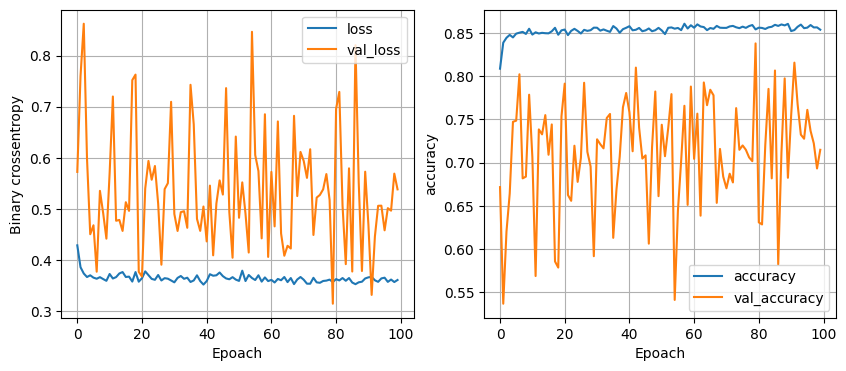

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8565 - loss: 0.3704
16 nodes, dropout 0, lr 0.1, batchsize 64


KeyboardInterrupt: 

In [39]:
lest_val_loss = float('inf')
lest_val_model = None
epochs=100
for num_nodes in (16, 32, 64):
    for dropout_prob in (0, 0.02):
        for lr in (0.1, 0.005, 0.001):
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batchsize {batch_size}")
                model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss, accu = model.evaluate(x_valid, y_valid)
                if val_loss< lest_val_loss:
                    lest_val_loss = val_loss
                    lest_val_model = model


        




In [40]:
y_pred = lest_val_model.predict(x_test)
y_pred = (y_pred>0.5).astype(int).reshape(-1,)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [42]:
y_pred

array([1, 1, 1, ..., 1, 1, 0], shape=(3804,))

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.70      0.77      1332
           1       0.85      0.94      0.90      2472

    accuracy                           0.86      3804
   macro avg       0.86      0.82      0.83      3804
weighted avg       0.86      0.86      0.85      3804



# Evaluating lin reg model
- mean abs error (MAE)
- mean squared error(MSE)
- root mean square error(RMSE)
- sqr(R)- coeff of defermination
